Portfolio concentration analysis saved!

PORTFOLIO CONCENTRATION SUMMARY

Top 5 companies account for: 47.2% of portfolio
Top 10 companies account for: 72.8% of portfolio

Total companies: 23
Total positions: 236
Average positions per company: 10.3

Most concentrated: ADBE (16.48%) with 9 positions
Least concentrated: KVUE (0.98%) with 11 positions

Company with most positions: CMCSA (47 positions, 6.63% allocation)


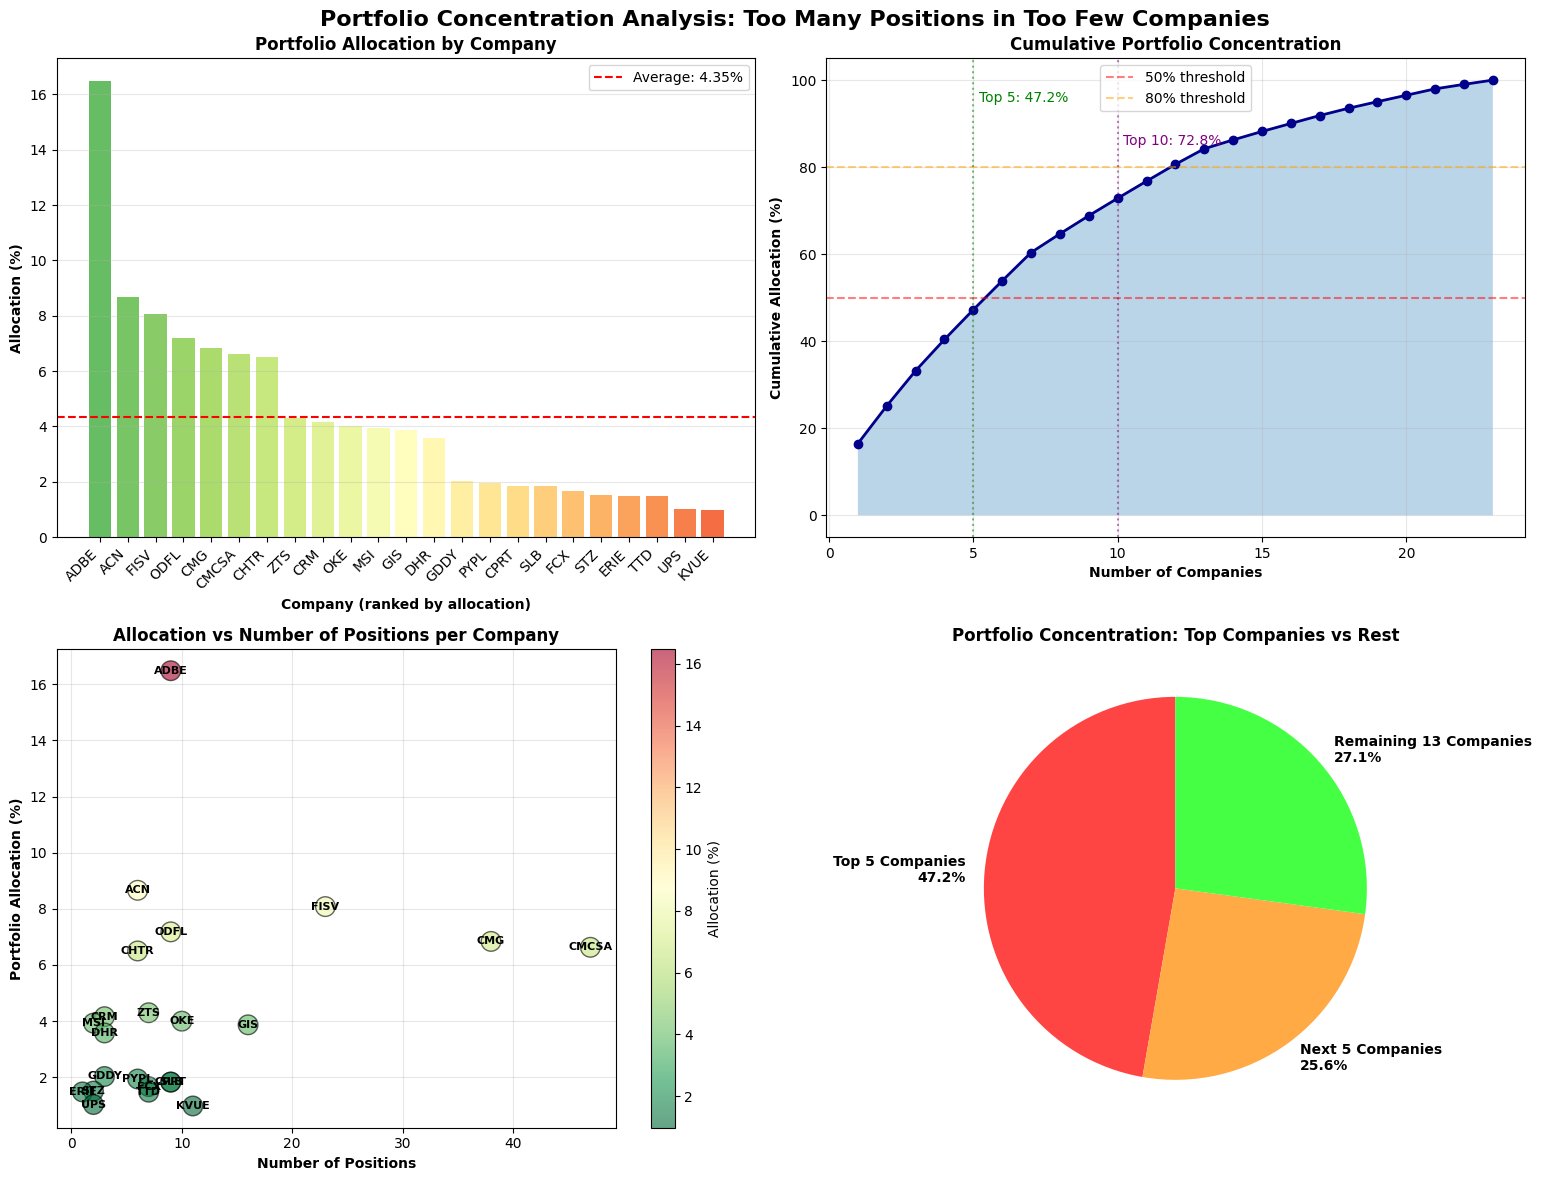

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Portfolio data
companies = [
    'ADBE', 'ACN', 'FISV', 'ODFL', 'CMG', 'CMCSA', 'CHTR', 'ZTS', 'CRM', 'OKE',
    'MSI', 'GIS', 'DHR', 'GDDY', 'PYPL', 'CPRT', 'SLB', 'FCX', 'STZ', 'ERIE',
    'TTD', 'UPS', 'KVUE'
]

allocations = [
    16.48, 8.66, 8.08, 7.18, 6.84, 6.63, 6.50, 4.30, 4.16, 4.00,
    3.93, 3.87, 3.58, 2.03, 1.94, 1.83, 1.83, 1.67, 1.51, 1.48,
    1.47, 1.03, 0.98
]

positions = [9, 6, 23, 9, 38, 47, 6, 7, 3, 10, 2, 16, 3, 3, 6, 9, 9, 7, 2, 1, 7, 2, 11]

# Calculate cumulative allocation
cumulative_allocation = np.cumsum(allocations)

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Portfolio Concentration Analysis: Too Many Positions in Too Few Companies', 
             fontsize=16, fontweight='bold')

# 1. Bar chart of allocations
ax1 = axes[0, 0]
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(companies)))
bars = ax1.bar(range(len(companies)), allocations, color=colors)
ax1.set_xlabel('Company (ranked by allocation)', fontweight='bold')
ax1.set_ylabel('Allocation (%)', fontweight='bold')
ax1.set_title('Portfolio Allocation by Company', fontweight='bold')
ax1.set_xticks(range(len(companies)))
ax1.set_xticklabels(companies, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=np.mean(allocations), color='red', linestyle='--', 
            label=f'Average: {np.mean(allocations):.2f}%')
ax1.legend()

# 2. Cumulative allocation curve
ax2 = axes[0, 1]
ax2.plot(range(1, len(companies) + 1), cumulative_allocation, 
         marker='o', linewidth=2, markersize=6, color='darkblue')
ax2.fill_between(range(1, len(companies) + 1), cumulative_allocation, alpha=0.3)
ax2.set_xlabel('Number of Companies', fontweight='bold')
ax2.set_ylabel('Cumulative Allocation (%)', fontweight='bold')
ax2.set_title('Cumulative Portfolio Concentration', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add reference lines
top_5_cumsum = sum(allocations[:5])
top_10_cumsum = sum(allocations[:10])
ax2.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.5, label='80% threshold')
ax2.axvline(x=5, color='green', linestyle=':', alpha=0.5)
ax2.text(5.2, 95, f'Top 5: {top_5_cumsum:.1f}%', fontsize=10, color='green')
ax2.axvline(x=10, color='purple', linestyle=':', alpha=0.5)
ax2.text(10.2, 85, f'Top 10: {top_10_cumsum:.1f}%', fontsize=10, color='purple')
ax2.legend()

# 3. Allocation vs Number of Positions scatter
ax3 = axes[1, 0]
scatter = ax3.scatter(positions, allocations, s=200, c=allocations, 
                     cmap='RdYlGn_r', alpha=0.6, edgecolors='black', linewidth=1)
for i, company in enumerate(companies):
    ax3.annotate(company, (positions[i], allocations[i]), 
                fontsize=8, ha='center', va='center', fontweight='bold')
ax3.set_xlabel('Number of Positions', fontweight='bold')
ax3.set_ylabel('Portfolio Allocation (%)', fontweight='bold')
ax3.set_title('Allocation vs Number of Positions per Company', fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Allocation (%)')

# 4. Pie chart showing concentration
ax4 = axes[1, 1]
# Group into top 5, next 5, and rest
top5_total = sum(allocations[:5])
next5_total = sum(allocations[5:10])
rest_total = sum(allocations[10:])

concentration_data = [top5_total, next5_total, rest_total]
concentration_labels = [
    f'Top 5 Companies\n{top5_total:.1f}%',
    f'Next 5 Companies\n{next5_total:.1f}%',
    f'Remaining 13 Companies\n{rest_total:.1f}%'
]
colors_pie = ['#ff4444', '#ffaa44', '#44ff44']

wedges, texts, autotexts = ax4.pie(concentration_data, labels=concentration_labels, 
                                     autopct='', colors=colors_pie,
                                     startangle=90, textprops={'fontweight': 'bold'})
ax4.set_title('Portfolio Concentration: Top Companies vs Rest', fontweight='bold')

# Add statistics text
stats_text = f"""
Key Concentration Metrics:
━━━━━━━━━━━━━━━━━━━━━
Top 5 companies: {top5_total:.1f}% of portfolio
Top 10 companies: {top_10_cumsum:.1f}% of portfolio
Remaining 13 companies: {rest_total:.1f}% of portfolio

Total positions across 23 companies: {sum(positions)}
Average positions per company: {np.mean(positions):.1f}
"""

# fig.text(0.98, 0.98, stats_text, fontsize=10, family='monospace',
#          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#          ha='right', va='top')

plt.tight_layout()
print("Portfolio concentration analysis saved!")

# Print summary statistics
print("\n" + "="*50)
print("PORTFOLIO CONCENTRATION SUMMARY")
print("="*50)
print(f"\nTop 5 companies account for: {top5_total:.1f}% of portfolio")
print(f"Top 10 companies account for: {top_10_cumsum:.1f}% of portfolio")
print(f"\nTotal companies: {len(companies)}")
print(f"Total positions: {sum(positions)}")
print(f"Average positions per company: {np.mean(positions):.1f}")
print(f"\nMost concentrated: {companies[0]} ({allocations[0]:.2f}%) with {positions[0]} positions")
print(f"Least concentrated: {companies[-1]} ({allocations[-1]:.2f}%) with {positions[-1]} positions")
print(f"\nCompany with most positions: {companies[positions.index(max(positions))]} ({max(positions)} positions, {allocations[positions.index(max(positions))]:.2f}% allocation)")